In [1]:
# ライブラリインポート
import random
from keras.utils.np_utils import to_categorical
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
asian_file_name_list=os.listdir("./face_images/Asian") # os.listdirはディレクトリ
print(len(asian_file_name_list))

1284


In [3]:
caucasian_file_name_list=os.listdir("./face_images/Caucasian")
print(len(caucasian_file_name_list))

3362


In [4]:
hispanic_file_name_list=os.listdir("./face_images/Hispanic")
print(len(hispanic_file_name_list))

494


In [5]:
multiracial_file_name_list=os.listdir("./face_images/Multiracial")
print(len(multiracial_file_name_list))

497


In [6]:
black_file_name_list=os.listdir("./face_images/Black")
print(len(black_file_name_list))

937


In [7]:
X_train=[]
y_train=[]
img_file_name_list = asian_file_name_list
print(len(img_file_name_list))

1284


In [8]:
img_file_name_list = black_file_name_list
print(len(img_file_name_list))

937


In [9]:
for i in range(0, 5):
    if i == 0:
        img_file_name_list = asian_file_name_list
        dir_name = "Asian/"
    elif i == 1:
        img_file_name_list = caucasian_file_name_list
        dir_name = "Caucasian/"
    elif i == 2:
        img_file_name_list = hispanic_file_name_list
        dir_name = "Hispanic/"
    elif i == 3:
        img_file_name_list = multiracial_file_name_list
        dir_name = "Multiracial/"
    elif i == 4:
        img_file_name_list = black_file_name_list
        dir_name = "Black/"
    
    for j in range(0,len(img_file_name_list)):
        n=os.path.join("./face_images/",dir_name,img_file_name_list[j])
        img = cv2.imread(n) #調べる
        b,g,r = cv2.split(img) #調べる
        img = cv2.merge([r,g,b]) #調べる
        img = cv2.resize(img,(64,64))
        X_train.append(img)
        y_train=np.append(y_train,i)

In [10]:
X_train=np.array(X_train)
print(X_train[0])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ..., 
 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ..., 
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [11]:
# 学習用ライブラリimport
from keras.models import Sequential, load_model
from keras.layers.convolutional import Convolution2D
from keras.layers import Dense, Dropout, Activation, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [12]:
y_train = to_categorical(y_train, 5)

In [13]:
print(y_train)

[[ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 ..., 
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.]]


In [14]:
X_train = X_train.astype('float32') / 255

In [15]:
# 学習logとmodelの保存用dir
f_log = './log'
f_model = './model'

In [16]:
# 確認
print(X_train.shape)
print(y_train[0])

(6574, 64, 64, 3)
[ 1.  0.  0.  0.  0.]


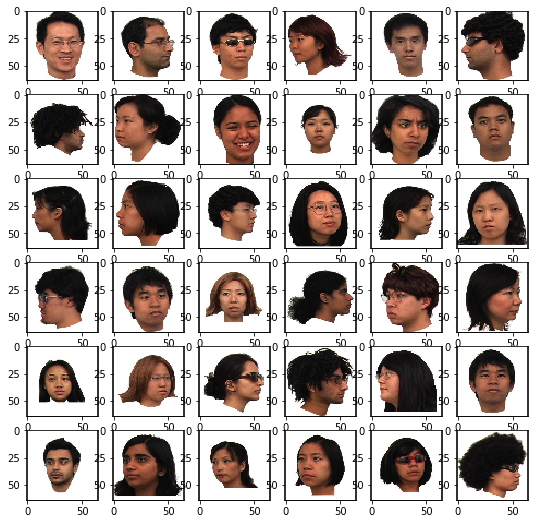

In [17]:
# show sample data(トレーニング用の画像を表示させる)
fig = plt.figure(figsize=(9,9))

for i in range(36):
    ax = fig.add_subplot(6,6, i+1, xticks=[], yticks=[]) #目盛なし
    ax = fig.add_subplot(6,6, i+1) #pixの大きさ目盛あり
    ax.imshow(X_train[i])
plt.show()

In [18]:
print(X_train[0][0][0]) #RGBの3チャンネル
print(X_train.shape[0])

[ 1.  1.  1.]
6574


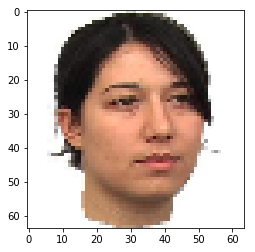

[ 0.  1.  0.  0.  0.]


In [19]:
plt.imshow(X_train[1700])
plt.show()
print(y_train[1700])

In [20]:
num_classes = 5

In [21]:
model = Sequential()

In [22]:
# CNN layer 1
model.add(Convolution2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CNN layer 2
model.add(Convolution2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# output
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [23]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 64)        18496     
__________

In [ ]:
model.compile(
loss='categorical_crossentropy',
optimizer=Adam(lr=0.001),
metrics=['accuracy']
)

In [ ]:
fit = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=50, #shouldn't be raised to 100, because the overfitting occurs.
    verbose=1,
    validation_split=0.1,
    shuffle=True
)

Train on 5916 samples, validate on 658 samples
Epoch 1/50
5916/5916 [==============================] - 215s - loss: 1.1117 - acc: 0.6154 - val_loss: 2.2094 - val_acc: 0.0137
Epoch 2/50
5916/5916 [==============================] - 222s - loss: 0.8579 - acc: 0.6968 - val_loss: 1.4099 - val_acc: 0.4438
Epoch 3/50
1344/5916 [=====>........................] - ETA: 163s - loss: 0.7865 - acc: 0.7232

In [ ]:
folder = 'results'
if not os.path.exists(folder):
    os.makedirs(folder)

### save weights
json_string = model.to_json()
open(os.path.join(folder,'race_model.json'), 'w').write(json_string)
model.save(os.path.join(folder, 'my_model.h5'))

In [ ]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))

# loss
def plot_history_loss(fit):
    # Plot the loss in the history
    axL.plot(fit.history['loss'],label="loss for training")
    axL.plot(fit.history['val_loss'],label="loss for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

# acc
def plot_history_acc(fit):
    # Plot the loss in the history
    axR.plot(fit.history['acc'],label="loss for training")
    axR.plot(fit.history['val_acc'],label="loss for validation")
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='upper right')

plot_history_loss(fit)
plot_history_acc(fit)
fig.savefig(os.path.join(folder, 'cifar10-tutorial.png'))
plt.show()
plt.close()